In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import glob
import os

In [4]:
path =r'C:/Users/depri/Desktop/OPS813 cloud computing/Project/case1/amex-nyse-nasdaq-stock-histories/fh_20190217/full_history'
allFiles = glob.glob(path + "/*.csv")

alldf = []
i=0

for file_ in allFiles:
    i+=1
    if i==10:
        break
    dftemp = pd.read_csv(file_,index_col=None, header=0)
    dftemp = dftemp.sort_values('date')
    #Calculating the 200 day moving average before merging all data
    dftemp["200d"] = np.round(dftemp["adjclose"].rolling(window = 200).mean(), 2)
    #Calculating the 50 day moving average before merging all data
    dftemp["50d"] = np.round(dftemp["adjclose"].rolling(window = 50).mean(), 2)
    dftemp["3d"] = np.round(dftemp["adjclose"].rolling(window = 3).mean(), 2)
    #Adding a new colmn stock name to identify the stock in question
    dftemp["StockName"]=os.path.basename(file_).split('.')[0]
    alldf.append(dftemp)

df = pd.concat(alldf, axis = 0, ignore_index = True)
df.columns = ["Date", "Volume","Open", "Close", "High", "Low", "AdjustedClose","200d","50d","3d","StockName"]
print(df)       

             Date    Volume       Open      Close       High        Low  \
0      1999-11-18  62546300  32.546494  31.473534  35.765381  28.612303   
1      1999-11-19  15234100  30.713520  28.880543  30.758226  28.478184   
2      1999-11-22   6577800  29.551144  31.473534  31.473534  28.657009   
3      1999-11-23   5975600  30.400572  28.612303  31.205294  28.612303   
4      1999-11-24   4843200  28.701717  29.372318  29.998211  28.612303   
5      1999-11-26   1729400  29.238197  29.461731  29.685265  29.148785   
6      1999-11-29   4074700  29.327610  30.132332  30.355865  29.014664   
7      1999-11-30   4310000  30.042919  30.177038  30.713520  29.282904   
8      1999-12-01   2957300  30.177038  30.713520  31.071173  29.953505   
9      1999-12-02   3069800  31.294706  31.562946  32.188843  30.892345   
10     1999-12-03   3041600  32.144135  31.831188  32.680614  31.697067   
11     1999-12-06   2250700  32.367668  32.725323  33.217094  32.322960   
12     1999-12-07   22159

In [13]:
# (1) find all stocks that are currently below their 200 day moving average.

#Dropping all rows with 200 day moving average as NaN
# dfna = df.dropna()
#Identifying most recent date per stock
# dfdate = dfna.groupby('StockName').max()['Date']
# dfdate
# keys = dfdate.index
# keys
#Filtering all recent stock who is currently below their 200 day moving average
dfna.loc[(dfna['AdjustedClose']<dfna['200d'])&(dfna['Date']=='2019-02-15')]
# dfna.loc[(dfna['AdjustedClose']<dfna['200d'])&(dfna['StockName'].isin(keys))&(dfna['Date'].isin(dfdate.loc[keys]))]

,Date,Volume,Open,Close,High,Low,AdjustedClose,200d,50d,StockName
17233,2019-02-15,3407600,28.709999,28.270000,28.930000,28.200001,28.270000,39.16,28.28,AA
23111,2019-02-15,8524900,68.949997,67.860001,68.949997,67.629997,67.860001,68.27,63.18,AABA
23385,2019-02-15,181000,2.990000,2.970000,3.000000,2.890000,2.970000,6.75,2.29,AAC
25544,2019-02-15,37900,45.259998,45.430000,45.430000,45.090000,45.430000,49.89,42.56,AADR
28914,2019-02-15,11426000,36.240002,35.049999,36.340000,34.959999,35.049999,37.49,33.74,AAL
30468,2019-02-15,400,34.480000,33.980000,34.480000,33.980000,33.980000,53.70,33.82,AAMC


In [5]:
# (2) find all stocks that are currently above their 200 day moving average
dfna.loc[(dfna['AdjustedClose']>dfna['200d'])&(dfna['Date']=='2019-02-15')]
# dfna.loc[(dfna['AdjustedClose']>dfna['200d'])&(dfna['StockName'].isin(keys))&(dfna['Date'].isin(dfdate.loc[keys]))]

,Date,Volume,Open,Close,High,Low,AdjustedClose,200d,50d,StockName
4840,2019-02-15,1903800,77.629997,78.300003,78.309998,77.470001,78.300003,66.96,70.92,A
40283,2019-02-15,300,2.730000,2.730000,2.730000,2.730000,2.730000,2.70,2.56,AAME


,Volume,Open,Close,High,Low,AdjustedClose,200d,50d
Volume,1.000000,-0.021616,-0.021739,-0.020850,-0.022572,-0.012374,-0.016307,-0.014484
Open,-0.021616,1.000000,0.999059,0.999504,0.999278,0.997467,0.866506,0.978278
Close,-0.021739,0.999059,1.000000,0.999511,0.999557,0.998431,0.864794,0.977341
High,-0.020850,0.999504,0.999511,1.000000,0.999078,0.998021,0.866380,0.978425
Low,-0.022572,0.999278,0.999557,0.999078,1.000000,0.997872,0.864240,0.976397
AdjustedClose,-0.012374,0.997467,0.998431,0.998021,0.997872,1.000000,0.866596,0.978972
200d,-0.016307,0.866506,0.864794,0.866380,0.864240,0.866596,1.000000,0.924073
50d,-0.014484,0.978278,0.977341,0.978425,0.976397,0.978972,0.924073,1.000000


(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

[Text(0,1,'Volume'),
 Text(0,1,'Open'),
 Text(0,1,'Close'),
 Text(0,1,'High'),
 Text(0,1,'Low'),
 Text(0,1,'AdjustedClose'),
 Text(0,1,'200d'),
 Text(0,1,'50d')]

[Text(0,0,'Volume'),
 Text(0,0,'Open'),
 Text(0,0,'Close'),
 Text(0,0,'High'),
 Text(0,0,'Low'),
 Text(0,0,'AdjustedClose'),
 Text(0,0,'200d'),
 Text(0,0,'50d')]

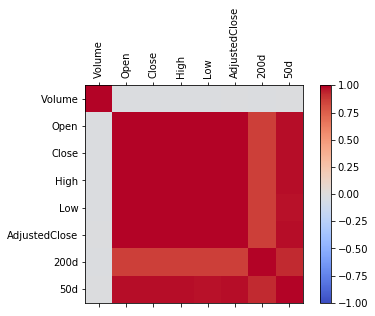

In [7]:
# (4) Is there a correlation
# between the two and the direction a stock moves? (5) as a group
# choose 6 or 7 stocks that seem interesting to buy and hold for a
# month.

#(3) Calcuating correlation between Adjusted Close and 50DMA and 200DMA
corr = df.corr()
corr
#visualizing the correlation data
colnames = ["Volume","Open", "Close", "High", "Low", "AdjustedClose","200d","50d"]
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(colnames),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(colnames)
ax.set_yticklabels(colnames)
plt.show()

In [14]:
# def trendline(data, order=1):
#     coeffs = np.polyfit(data.index.values, list(data), order)
#     slope = coeffs[-2]
#     return float(slope)

# slope = trendline(df['AdjustedClose'])
# slope

# # Plot the closing prices for all stocks
# df[['Date','AdjustedClose']].plot();

# # Show the plot
# plt.show();
df['PercentageChange'] = df['AdjustedClose'].pct_change()
df['Date'] = pd.to_datetime(df['Date'])
lineplot = df[['Date','PercentageChange','StockName']]
# lineplot['Date'] = pd.to_datetime(lineplot['Date'])
# lineplot
# lineplot.plot(x='Date',y='PercentageChange')

lineplot.groupby(['StockName'])
# fig, ax = plt.subplots()

# for key, grp in lineplot.groupby(['StockName']):
#     ax = grp.plot(ax=ax, kind='line', x='Date', y='PercentageChange', c=key, label=key)

# plt.legend(loc='best')
# plt.show()

In [ ]:
# 